<a href="https://colab.research.google.com/github/Joysusan7/Analysis-of-Employee-Turnover-and-Satisfaction-/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importing the data set

In [ ]:
mydata = pd.read_csv('/content/HR_Analytics.csv')

printing the unique values in required columns

In [ ]:
print(mydata['salary'].unique())

['low' 'medium' 'high']


In [ ]:
mydata

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Converting salary into integers

In [ ]:
mydata['salary'] = mydata['salary'].replace(['low'], 1)
mydata['salary'] = mydata['salary'].replace(['medium'], 2)
mydata['salary'] = mydata['salary'].replace(['high'], 3)

printing the Columns in the dataframe and the first row of the dataframe

In [ ]:
print(type(mydata))
print(mydata.keys())
print('\nFor an employee\n')
print(mydata.loc[0,:])

<class 'pandas.core.frame.DataFrame'>
Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

For an employee

satisfaction_level        0.38
last_evaluation           0.53
number_projects              2
average_montly_hours       157
time_spend_company           3
work_accident                0
left                         1
promotion_last_5years        0
department               sales
salary                       1
Name: 0, dtype: object


In [ ]:
salary_counts = mydata['salary'].value_counts()
salary_counts

1    7316
2    6446
3    1237
Name: salary, dtype: int64

# Employees left by salary

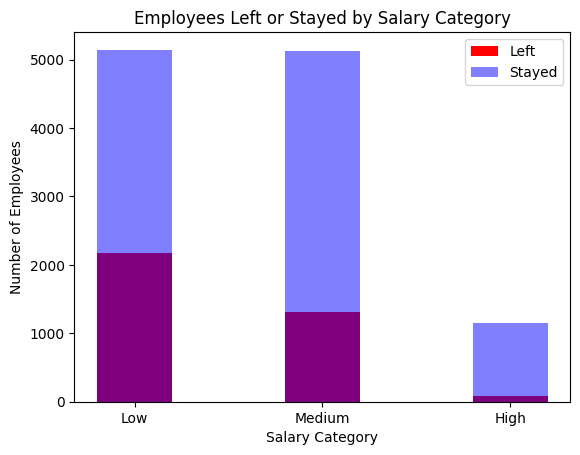

In [ ]:
# Mapping the numeric salary values to corresponding labels
salary_labels = {1: 'Low', 2: 'Medium', 3: 'High'}

# Creating a DataFrame for left and stayed employees
left_counts = mydata[mydata['left'] == 1]['salary'].map(salary_labels).value_counts()
stayed_counts = mydata[mydata['left'] == 0]['salary'].map(salary_labels).value_counts()

# Generating x-axis positions
x = range(len(left_counts))

# Plotting the bar chart for employees who left
plt.bar(x, left_counts.values, color='red', label='Left', width = 0.4)

# Plotting the bar chart for employees who stayed
plt.bar(x, stayed_counts.values, color='blue', label='Stayed', width = 0.4, alpha=0.5)

# Adding labels and title to the plot
plt.xlabel('Salary Category')
plt.ylabel('Number of Employees')
plt.title('Employees Left or Stayed by Salary Category')

# Customizing x-axis tick labels
plt.xticks(x, left_counts.index)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

Low       2172
Medium    1317
High        82
Name: salary, dtype: int64
Low       5144
Medium    5129
High      1155
Name: salary, dtype: int64


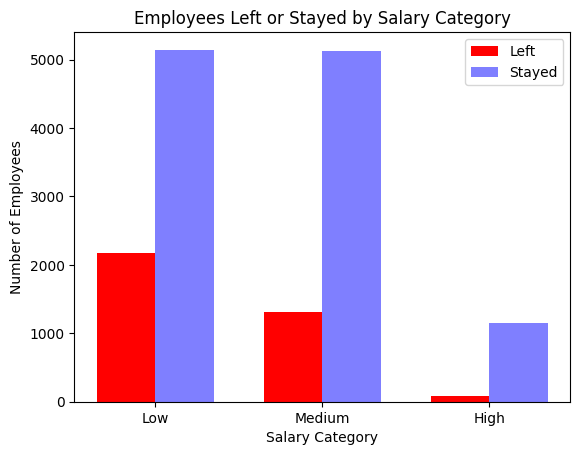

In [ ]:
# Mapping the numeric salary values to corresponding labels
salary_labels = {1: 'Low', 2: 'Medium', 3: 'High'}

# Creating a DataFrame for left and stayed employees
left_counts = mydata[mydata['left'] == 1]['salary'].map(salary_labels).value_counts()
stayed_counts = mydata[mydata['left'] == 0]['salary'].map(salary_labels).value_counts()

print(left_counts)
print(stayed_counts)

# Generating x-axis positions
x = np.arange(len(left_counts))

# Setting the bar width
bar_width = 0.35

# Plotting the bar chart for employees who left
plt.bar(x, left_counts.values, color='red', label='Left', width=bar_width)

# Plotting the bar chart for employees who stayed
plt.bar(x + bar_width, stayed_counts.values, color='blue', label='Stayed', width=bar_width, alpha=0.5)

# Adding labels and title to the plot
plt.xlabel('Salary Category')
plt.ylabel('Number of Employees')
plt.title('Employees Left or Stayed by Salary Category')

# Customizing x-axis tick labels
plt.xticks(x + bar_width / 2, left_counts.index)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
mydata[mydata['left']==1]['salary'].map(salary_labels).value_counts()

Low       2172
Medium    1317
High        82
Name: salary, dtype: int64

# Employees left by Number of projects


In [ ]:
mydata['number_projects'].unique()

array([2, 5, 7, 6, 4, 3])

In [ ]:
stayed_projects = mydata[mydata['left'] == 0]['number_projects'].value_counts()
stayed_projects[7] = 0
print(stayed_projects)

left_projects = mydata[mydata['left']==1]['number_projects'].value_counts()
print('\n',left_projects)

3    3983
4    3956
5    2149
2     821
6     519
7       0
Name: number_projects, dtype: int64

 2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_projects, dtype: int64


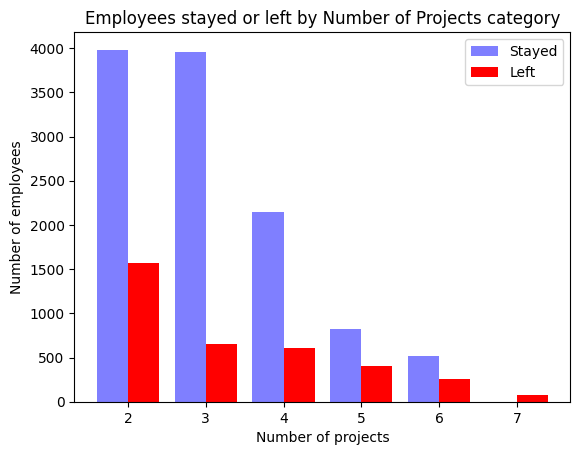

In [ ]:
x = np.arange(2,8)
plt.bar(x, stayed_projects.values, color = 'blue', label = 'Stayed', width = 0.4, alpha = 0.5)
plt.bar(x+0.4, left_projects.values, color = 'red', label = 'Left', width = 0.4)
plt.legend()
plt.xlabel('Number of projects')
plt.ylabel('Number of employees')
plt.title('Employees stayed or left by Number of Projects category')
plt.xticks(x + 0.4 / 2, x)
plt.show()

In [ ]:
stayed_tsc = mydata[mydata['left'] == 0]['time_spend_company'].value_counts()
print(stayed_tsc)
left_tsc = mydata[mydata['left'] == 1]['time_spend_company'].value_counts()
left_tsc[7]=left_tsc[8]=left_tsc[10]=left_tsc[9]=0
stayed_tsc[9]=0
left_tsc

3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


3     1586
4      890
5      833
6      209
2       53
7        0
8        0
10       0
9        0
Name: time_spend_company, dtype: int64

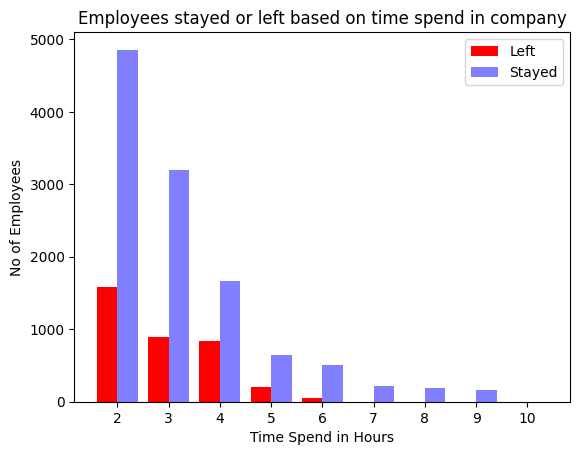

In [ ]:
x = np.arange(2,11)
plt.bar(x, left_tsc, color = 'red', label = 'Left', width = 0.4)
plt.bar(x+0.4, stayed_tsc, color = 'blue', label = 'Stayed', width = 0.4, alpha = 0.5)
plt.ylabel('No of Employees')
plt.title('Employees stayed or left based on time spend in company')
plt.xlabel('Time Spend in Hours')
plt.xticks(x+0.2, x)
plt.legend()
plt.show()

0    11128
1      300
Name: promotion_last_5years, dtype: int64 0    3552
1      19
Name: promotion_last_5years, dtype: int64


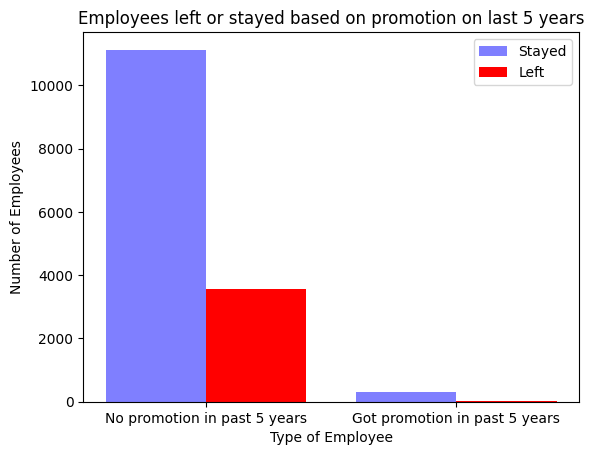

In [ ]:
stay_promotion = mydata[mydata['left'] == 0]['promotion_last_5years'].value_counts()
left_promotion = mydata[mydata['left'] == 1]['promotion_last_5years'].value_counts()
print(stay_promotion,left_promotion)
plt.bar([0,1], stay_promotion.values, label = 'Stayed', width = 0.4, color = 'blue', alpha = 0.5)
plt.bar([0.4, 1.4], left_promotion.values, label = 'Left', width = 0.4, color = 'red')
plt.legend()
plt.title("Employees left or stayed based on promotion on last 5 years")
plt.xticks([0.2, 1.2], ['No promotion in past 5 years', 'Got promotion in past 5 years'])
plt.ylabel("Number of Employees")
plt.xlabel("Type of Employee")
plt.show()

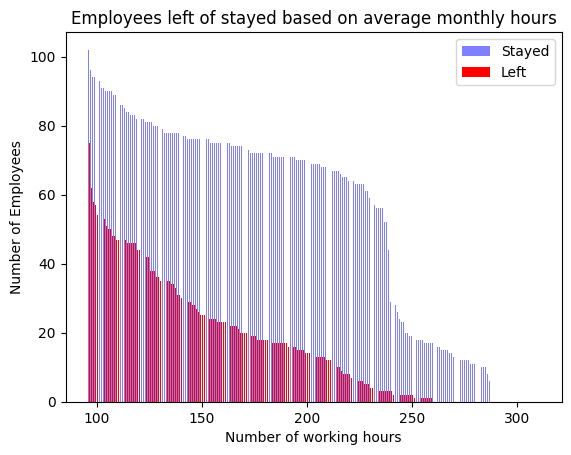

In [ ]:
stay_amh = mydata[mydata['left'] == 0]['average_montly_hours'].value_counts()
left_amh = mydata[mydata['left'] == 1]['average_montly_hours'].value_counts()
a=stay_amh.keys()
b=left_amh.keys()
LL = min(min(a),min(b))
UL = max(max(a),max(b))


x = np.arange(LL, UL+1)

for i in range(LL, UL+1):
  if i not in stay_amh.keys():
    stay_amh[i] = 0
for i in range(LL, UL+1):
  if i not in left_amh.keys():
    left_amh[i] = 0

plt.bar(x, stay_amh.values, color = 'blue', width = 0.4, label = 'Stayed', alpha = 0.5)
plt.bar(x+0.4, left_amh.values, color = 'red', width = 0.4, label = 'Left')
plt.legend()
plt.title('Employees left of stayed based on average monthly hours')
plt.xlabel('Number of working hours')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
print(len(mydata[mydata['left']==0]))
len(mydata[mydata['left']==1])

11428


3571

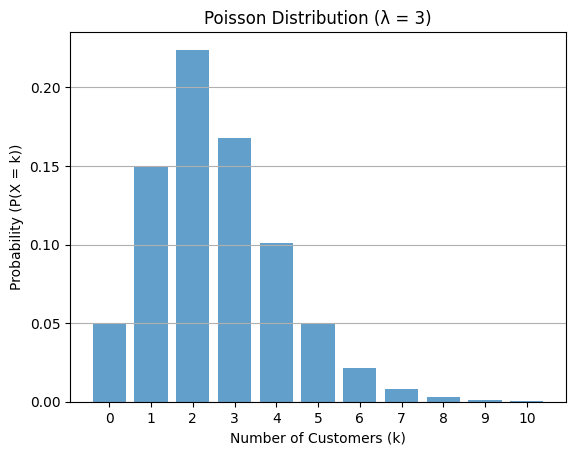

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values of k (number of customers)
k_values = np.arange(0, 11)

# Probabilities calculated using the Poisson distribution
probabilities = [
    0.0498, 0.1494, 0.2240, 0.1680, 0.1008,
    0.0504, 0.0216, 0.0081, 0.0027, 0.0008, 0.0002
]

plt.bar(k_values, probabilities, align='center', alpha=0.7)
plt.xlabel('Number of Customers (k)')
plt.ylabel('Probability (P(X = k))')
plt.title('Poisson Distribution (λ = 3)')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()
